# Text-to-Speech VITS

VITS, End-to-End.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-vits](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-vits).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

<div class="alert alert-warning">

Required PyTorch >= 1.10.
    
</div>

In [4]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [5]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### VITS description

1. Malaya-speech VITS generate End-to-End, from text input into waveforms with 22050 sample rate.
2. No length limit, but to get better results, split the text.

### List available VITS

In [6]:
malaya_speech.tts.available_vits()

,Size (MB),Understand punctuation,Is lowercase
mesolitica/VITS-osman,145,True,False
mesolitica/VITS-yasmin,145,True,False
mesolitica/VITS-female-singlish,145,True,True
mesolitica/VITS-haqkiem,145,True,False
mesolitica/VITS-orkid,145,True,False
mesolitica/VITS-bunga,145,True,False
mesolitica/VITS-jebat,145,True,False
mesolitica/VITS-tuah,145,True,False


### Load VITS model

Fastspeech2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works, **to get better speech synthesis, make sure Malaya version > 4.9.1**,

```bash
pip install malaya -U
```

```python
def vits(model: str = 'mesolitica/VITS-osman', **kwargs):
    """
    Load VITS End-to-End TTS model.

    Parameters
    ----------
    model : str, optional (default='mesolitica/VITS-osman')
        Check available models at `malaya_speech.tts.available_vits()`.
    Returns
    -------
    result : malaya_speech.torch_model.synthesis.VITS class
    """
```

In [9]:
osman = malaya_speech.tts.vits(model = 'mesolitica/VITS-osman')

In [16]:
# https://www.sinarharian.com.my/article/115216/BERITA/Politik/Syed-Saddiq-pertahan-Dr-Mahathir
string1 = 'Syed Saddiq berkata, mereka seharusnya mengingati bahawa semasa menjadi Perdana Menteri Pakatan Harapan'

### Predict

```python
def predict(
    self,
    string,
    temperature: float = 0.6666,
    temperature_durator: float = 0.6666,
    length_ratio: float = 1.0,
    **kwargs,
):
    """
    Change string to waveform.

    Parameters
    ----------
    string: str
    temperature: float, optional (default=0.6666)
        Decoder model trying to decode with encoder(text) + random.normal() * temperature.
    temperature_durator: float, optional (default=0.6666)
        Durator trying to predict alignment with random.normal() * temperature_durator.
    length_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.

    Returns
    -------
    result: Dict[string, ids, alignment, y]
    """
```

It only able to predict 1 text for single feed-forward.

In [10]:
r_osman = osman.predict(string1)
r_osman.keys()

dict_keys(['string', 'ids', 'alignment', 'y'])

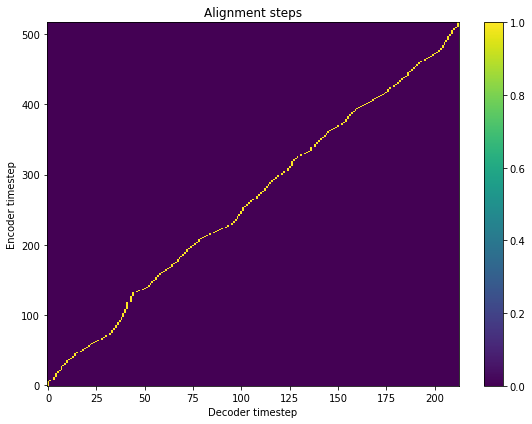

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    r_osman['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

In [13]:
ipd.Audio(r_osman['y'], rate = 22050)

In [14]:
string2 = 'Haqkiem adalah pelajar tahun akhir yang mengambil Ijazah Sarjana Muda Sains Komputer Kecerdasan Buatan utama dari Universiti Teknikal Malaysia Melaka (UTeM) yang kini berusaha untuk latihan industri di mana dia secara praktikal dapat menerapkan pengetahuannya dalam Perisikan Perisian dan Pengaturcaraan ke arah organisasi atau industri yang berkaitan.'

In [15]:
r_osman = osman.predict(string2)
r_osman.keys()

dict_keys(['string', 'ids', 'alignment', 'y'])

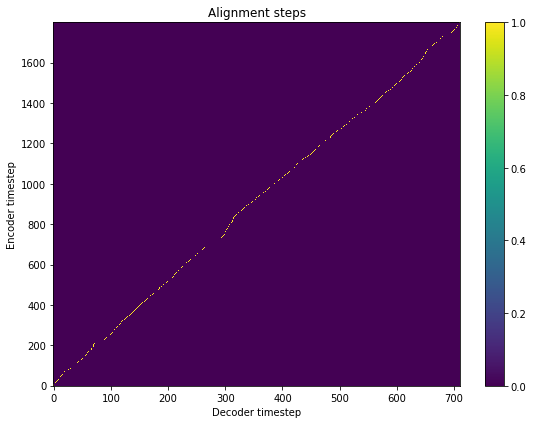

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    r_osman['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

In [17]:
ipd.Audio(r_osman['y'], rate = 22050)

### Compare different speakers

In [17]:
yasmin = malaya_speech.tts.vits(model = 'mesolitica/VITS-yasmin')

In [18]:
haqkiem = malaya_speech.tts.vits(model = 'mesolitica/VITS-haqkiem')

In [19]:
orkid = malaya_speech.tts.vits(model = 'mesolitica/VITS-orkid')

In [20]:
bunga = malaya_speech.tts.vits(model = 'mesolitica/VITS-bunga')

In [21]:
jebat = malaya_speech.tts.vits(model = 'mesolitica/VITS-jebat')

In [22]:
tuah = malaya_speech.tts.vits(model = 'mesolitica/VITS-tuah')

In [40]:
s = 'Haqkiem adalah pelajar tahun akhir yang mengambil Ijazah Sarjana Muda Sains Komputer Kecerdasan Buatan utama'

In [41]:
r = osman.predict(s)
ipd.Audio(r['y'], rate = 22050)

In [42]:
r = haqkiem.predict(s)
ipd.Audio(r['y'], rate = 22050)

In [43]:
r = orkid.predict(s)
ipd.Audio(r['y'], rate = 22050)

In [44]:
r = bunga.predict(s)
ipd.Audio(r['y'], rate = 22050)

In [45]:
r = jebat.predict(s)
ipd.Audio(r['y'], rate = 22050)

In [46]:
r = tuah.predict(s)
ipd.Audio(r['y'], rate = 22050)